In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

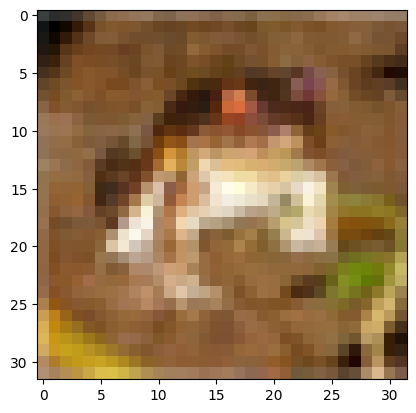

In [ ]:
mnist = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

In [ ]:
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
print('X_train shape:', x_train.shape)

X_train shape: (50000, 32, 32, 3)


In [ ]:
#numero de classes

k = len(set(y_train))
print('Numero de classes:', k)

Numero de classes: 10


# **Modelo**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train[0].shape),
    tf.keras.layers.Conv2D(32, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Conv2D(128, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(k, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3699 - loss: 1.7187 - val_accuracy: 0.5486 - val_loss: 1.2468
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5622 - loss: 1.2271 - val_accuracy: 0.6117 - val_loss: 1.0836
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6260 - loss: 1.0526 - val_accuracy: 0.6392 - val_loss: 1.0217
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6683 - loss: 0.9376 - val_accuracy: 0.6667 - val_loss: 0.9395
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7031 - loss: 0.8319 - val_accuracy: 0.6928 - val_loss: 0.8854
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7360 - loss: 0.7491 - val_accuracy: 0.7043 - val_loss: 0.8517
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7645 - loss: 0.6650 - val_accuracy: 0.6983 - val_loss: 0.8774
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7759 - loss: 0.6223 -

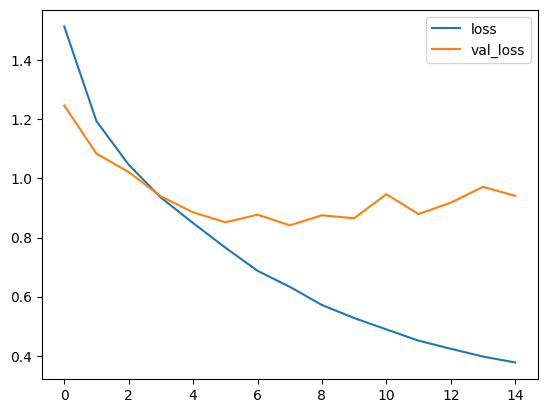

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

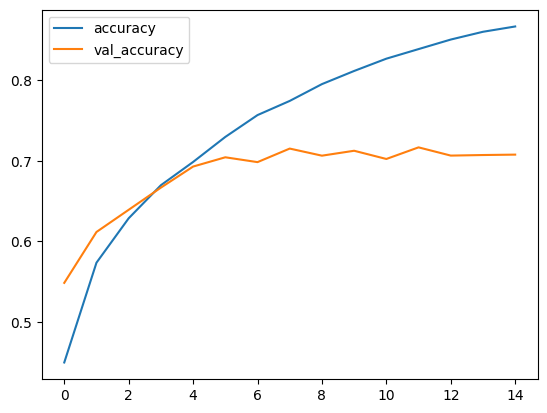

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# **Predictions**

In [ ]:
import numpy as np

P = model.predict(x_test)
P = np.round(P).flatten()
print(P)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. ... 1. 0. 0.]


In [ ]:
print('Acurácia: ', model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.9338
Acurácia:  [0.941285252571106, 0.7075999975204468]


# **Matriz de confusão**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[765  25  37  17  28   4  11  12  57  44]
 [ 13 866   6   5   7   3  11   3  15  71]
 [ 70   8 563  56 127  47  72  32  11  14]
 [ 23  11  69 468 108 144  89  51  17  20]
 [ 19   4  50  54 712  25  39  86   9   2]
 [ 10   7  46 213  86 511  40  65   4  18]
 [  6  11  42  40  54  13 816   8   5   5]
 [ 17   7  27  30  56  36   9 801   1  16]
 [ 67  50  15  11  12   5   8   7 791  34]
 [ 43 105  10  11   4   4   6  15  19 783]]


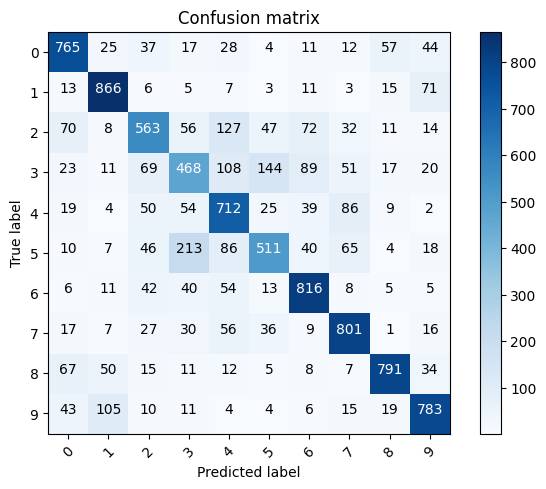

In [ ]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: bird Predicted: cat')

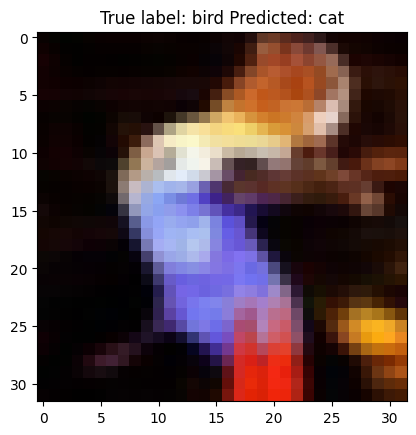

In [ ]:
#Show misdisclassified samples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))